In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
DATA = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Model_Validation.csv')


DATA.info()
DATA.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Inputs   1000 non-null   float64
 1   Outputs  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


(1000, 2)

In [71]:
DATA.head()

,Inputs,Outputs
0,-0.752759,-0.352622
1,2.704286,0.192409
2,1.391964,0.558147
3,0.591951,0.950694
4,-2.063888,-1.212273


# Data Frame Split

In [41]:
from sklearn.model_selection import  train_test_split                             # DF Split과 Array Split 중 하나만 하면 됨

TR_DATA, TE_DATA = train_test_split(DATA, test_size = 0.3, random_state = 2045)

In [42]:
TR_DATA.shape, TE_DATA.shape

((700, 2), (300, 2))

# Array Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(DATA[['Inputs']], DATA['Outputs'],
                                                    test_size = 0.3, random_state = 2045) 

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 1), (700,), (300, 1), (300,))

In [68]:
y_train.head()

818   -0.849129
615    1.042056
872    0.374570
394   -0.540516
435    0.729848
Name: Outputs, dtype: float64

# Train Data 시각화

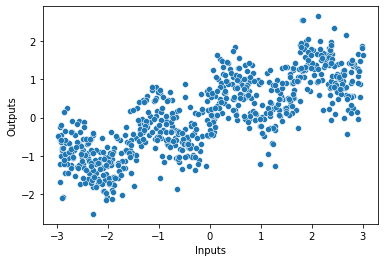

In [69]:
sns.scatterplot(X_train['Inputs'], y_train)           # 인자 주의
plt.show()

# Test Data 시각화

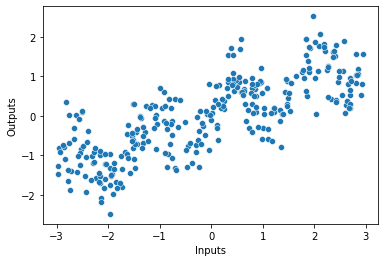

In [70]:
sns.scatterplot(X_test['Inputs'], y_test)
plt.show()

# 5차 모델 Testing Error

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

In [27]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

In [29]:
from sklearn.metrics import mean_squared_error

TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

0.3602980472002336

# 5차 모델 시각화

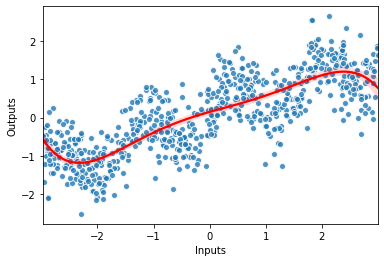

In [55]:
sns.regplot(x= 'Inputs', y = 'Outputs', data = TR_DATA,
            line_kws = {'color': 'red'},
            scatter_kws = {'edgecolor': 'white'},
            order = 5)
plt.show()

# 7차 모델 Testing Error

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 7, include_bias = False)
PX_7_TR = poly.fit_transform(X_train)

In [31]:
from sklearn.linear_model import LinearRegression

Model_7 = LinearRegression()
Model_7.fit(PX_7_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
PX_7_TE = poly.fit_transform(X_test)

y_hat_7 = Model_7.predict(PX_7_TE)

In [34]:
from sklearn.metrics import mean_squared_error

TE_Err_7 = mean_squared_error(y_test, y_hat_7)
TE_Err_7

0.35784993736519366

# 7차 모델 시각화

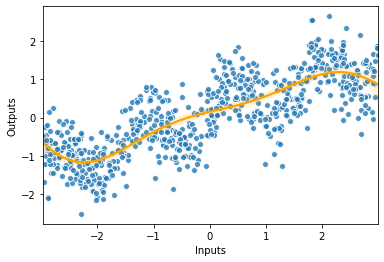

In [56]:
sns.regplot(x= 'Inputs', y = 'Outputs', data = TR_DATA,
            line_kws = {'color': 'orange'},
            scatter_kws = {'edgecolor': 'white'},
            order = 7)
plt.show()

# 9차 모델 Testing Error

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [36]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
PX_9_TE = poly.fit_transform(X_test)

y_hat_9 = Model_9.predict(PX_9_TE)

In [38]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

0.2893114750133329

# 9차 모델 시각화

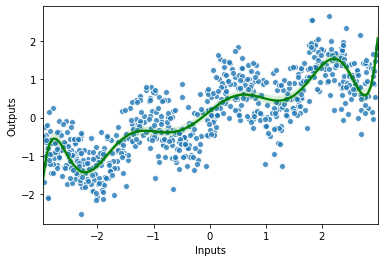

In [54]:
sns.regplot(x= 'Inputs', y = 'Outputs', data = TR_DATA,
            line_kws = {'color': 'green'},
            scatter_kws = {'edgecolor': 'white'},
            order = 9)
plt.show()

# 3개 Model 시각화

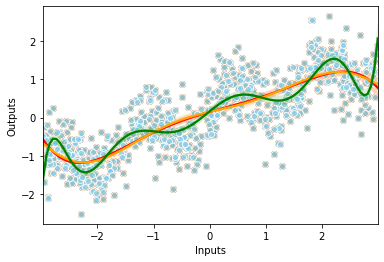

In [62]:
sns.regplot(x= 'Inputs', y = 'Outputs', data = TR_DATA, line_kws = {'color': 'red'}, order = 5)
sns.regplot(x= 'Inputs', y = 'Outputs', data = TR_DATA, line_kws = {'color': 'orange'}, order = 7)
sns.regplot(x= 'Inputs', y = 'Outputs', data = TR_DATA, line_kws = {'color': 'green'}, order = 9,
            scatter_kws = {'color': 'skyblue', 'edgecolor': 'white'})
plt.show()

# Testing Error 비교

In [47]:
print('5차 모델 : ',TE_Err_5)
print('7차 모델 : ',TE_Err_7)
print('9차 모델 : ',TE_Err_9)

5차 모델 :  0.3602980472002336
7차 모델 :  0.35784993736519366
9차 모델 :  0.2893114750133329
